In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import seed 
from numpy.random import randint 
from math import sqrt,exp,pi

In [2]:
def conv_2D(img,kernel):
    kr,kc = kernel.shape
    kernel=np.flip(kernel)
    row,col=img.shape
    out_img=np.zeros((row+kr-1,col+kc-1),'complex')
    k=kernel.shape[0]
    img_pad= np.zeros((row+ 2*(kr-1),col + 2*(kc-1)))
    u1 = kr-1
    u2 = kc-1
    img_pad[u1:-u1, u2:-u2] = img
    for i in range(out_img.shape[0]):
        for j in range(out_img.shape[1]):
            out_img[i,j]= (kernel*img_pad[i:i+k,j:j+k]).sum()
    return out_img

In [3]:
# x=np.array([[1,2,3],[4,5,6],[7,8,9]])
# war2 =conv_2D(x,x)
# x1 =  np.pad(x,(1,1),mode='constant')
# war1 = np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(x1) * np.fft.fft2(x1)))

In [4]:
def DFT_2D(img):
    M,N=img.shape
    F=np.zeros((M,N),dtype=complex)
    f=np.asarray(img,dtype=float)
    for m in range(M):
        for n in range(N):
            for x in range(M):
                for y in range(N):
                    factor=((m*x)/M)+((n*y)/N)
                    F[m,n]+=(f[x,y]*np.exp((-1*2j*pi)*factor))                
    return F

In [5]:
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    factor= [np.exp(-2j*pi*k/N) for k in range(N//2)]
    return np.array([even[k] + factor[k]*odd[k] for k in range(N//2)] + \
           [even[k] - factor[k]*odd[k] for k in range(N//2)])
def fft2(img):
    M,N=img.shape
    if(M%2!=0):
        return DFT_2D(img)
    f=np.asarray(img,dtype=float)
    F=np.zeros((M,N),dtype=complex)
    Int=np.zeros((M,N),dtype=complex)
    for i in range(M):
        Int[i,:]=fft(f[i,:])
    for j in range(N):
        F[:,j]=fft(Int[:,j])
    return F    

In [6]:
def un_ifft(x):
    N = len(x)
    if N <= 1: return x
    even = un_ifft(x[0::2])
    odd =  un_ifft(x[1::2])
    factor= [np.exp(2j*pi*k/N) for k in range(N//2)]
    return  np.array([even[k] + factor[k]*odd[k] for k in range(N//2)] + \
           [even[k] - factor[k]*odd[k] for k in range(N//2)])
def ifft(x):
    return (1/x.size) * un_ifft(x)
def ifft2(img):
    M,N=img.shape
    if(M%2!=0):
        return IDFT_2D(img)
    F=np.asarray(img,dtype=complex)
    f=np.zeros((M,N),dtype=complex)
    Int=np.zeros((M,N),dtype=complex)
    for i in range(M):
        Int[:,i]=ifft(F[:,i])
    for j in range(N):
        f[j,:]=ifft(Int[j,:])
    return f

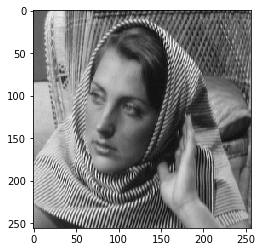

In [7]:
barb=cv.imread('../images/barbara.ppm',0)
plt.imshow(barb,cmap="gray")

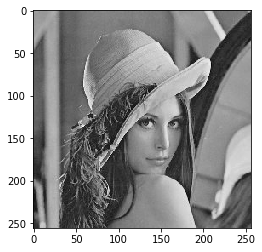

In [8]:
lena=cv.imread('../images/lena256.jpg',0)
plt.imshow(lena,cmap="gray")

## Part- 1

In [9]:
f=np.copy(barb)
h=np.copy(lena)

In [10]:
z = np.fft.ifftshift(ifft2(fft2(f) * fft2(h)))
res1 = conv_2D(f,h)

In [11]:
u =z.shape[0]
u = int(u/2)
res_center  = res1[u-1:-u,u-1:-u]

Text(0.5, 1.0, 'f convolve h')

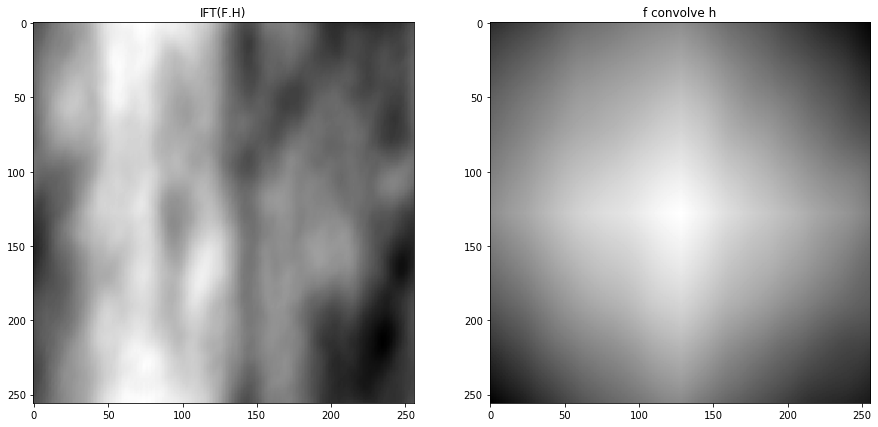

In [40]:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(np.log(np.abs(z)),cmap="gray")
axarr[1].imshow(np.log(np.abs(res_center)),cmap="gray")
axarr[0].set_title("IFT(F.H)")
axarr[1].set_title("f convolve h")

In [12]:
np.allclose(res_center,z)

False

In [13]:
diff = (res_center - z)**2

In [14]:
np.average(diff)

(1.9516986256474774e+17-0.40367872971242347j)

#### Average of squared difference between pixel values in IFT(F.H) and the central 256 × 256 portion of f * h is 1.95e+17

Because Linear Convolution in time domain is **not equal** to multiplication in frequency domain for DFT

## Part- 2

In [15]:
f_n = np.pad(f,(127,128),'constant')
h_n = np.pad(h,(128,127),'constant')
f_n.shape

(511, 511)

**As 511 is not a power of 2, implemented method of fft fails , hence used inbuilt fft function here**

In [16]:
z_n = np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(f_n) * np.fft.fft2(h_n)))

Text(0.5, 1.0, 'f convolve h')

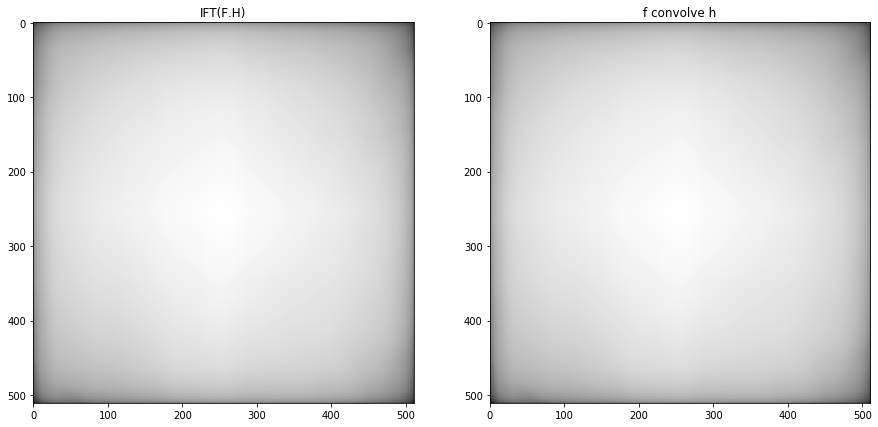

In [41]:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(np.log(np.abs(z_n)),cmap="gray")
axarr[1].imshow(np.log(np.abs(res1)),cmap="gray")
axarr[0].set_title("IFT(F.H)")
axarr[1].set_title("f convolve h")

In [17]:
# z_n = np.fft.ifftshift(ifft2(fft2(f_n) * fft2(h_n)))

In [18]:
np.allclose(z_n,res1)

True

In [19]:
diff_n = (res1-z_n)**2
np.average(diff_n)

(9.16435966317852e-15-2.4861102890995153e-16j)

#### Average of squared difference between pixel values in IFT(F.H) and the 511 × 511  f * h is 9.16e-15

* Because Circular Convolution in time domain is equal to multiplication in frequency domain for DFT

## Part -3

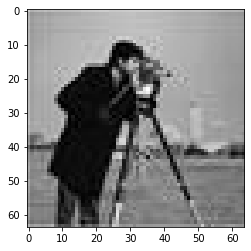

In [20]:
grapher=cv.imread('../images/photographer.jpg',0)
plt.imshow(grapher,cmap="gray")

In [21]:
grapher_128 = np.pad(grapher,((0,64),(0,64)),'constant')
grapher_256 = np.pad(grapher,((0,192),(0,192)),'constant')
grapher_512 = np.pad(grapher,((0,448),(0,448)),'constant')

In [22]:
print(grapher.shape,grapher_128.shape,grapher_256.shape,grapher_512.shape)

(64, 64) (128, 128) (256, 256) (512, 512)


In [23]:
G1 = np.fft.fftshift(fft2(grapher))
ms1 = 20*np.log(np.abs(G1))

In [24]:
G2 = np.fft.fftshift(fft2(grapher_128))
ms2 = 20*np.log(np.abs(G2))

In [25]:
G3 = np.fft.fftshift(fft2(grapher_256))
ms3 = 20*np.log(np.abs(G3))

In [26]:
G4 = np.fft.fftshift(fft2(grapher_512))
ms4 = 20*np.log(np.abs(G4))

Text(0.5, 1.0, '512X512 FFT')

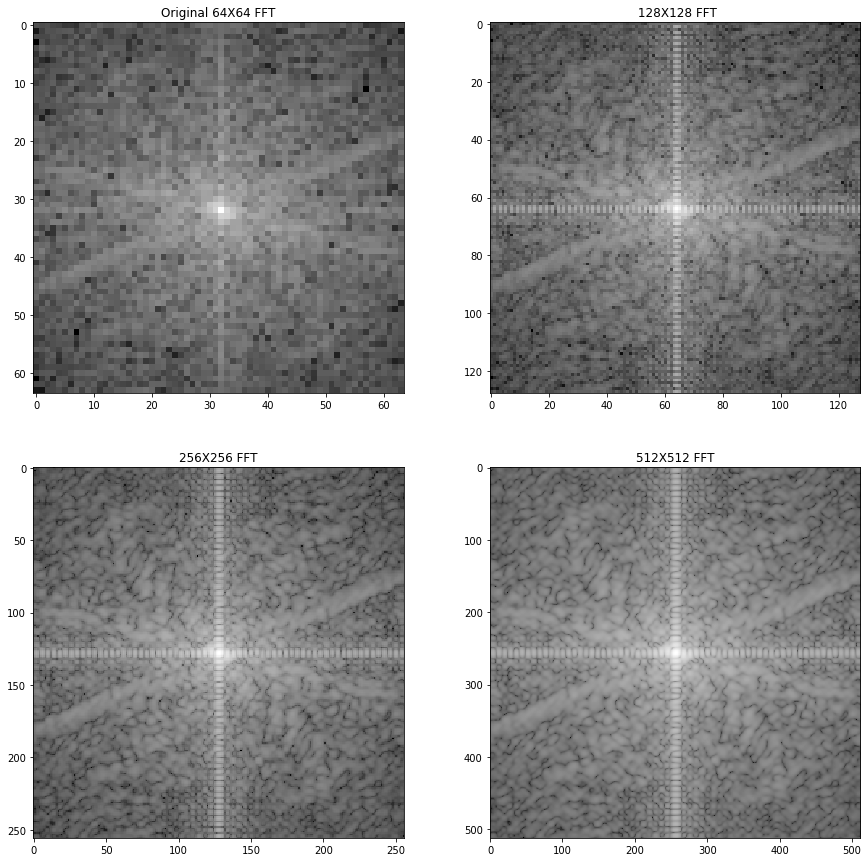

In [31]:
f, axarr = plt.subplots(2,2,figsize=(15,15))
axarr[0,0].imshow(ms1,cmap="gray")
axarr[0,1].imshow(ms2,cmap="gray")
axarr[1,0].imshow(ms3,cmap="gray")
axarr[1,1].imshow(ms4,cmap="gray")

axarr[0,0].set_title("Original 64X64 FFT")
axarr[0,1].set_title(" 128X128 FFT")
axarr[1,0].set_title("256X256 FFT")
axarr[1,1].set_title("512X512 FFT")

###  Relationship between the four outputs : -
* The padded ones are all similar but the initial image’s fft is different. Zero-padding will indeed increase the frequency resolution.
* If padding is done then high frequencies will be employed in the image, hence the pattern.
* Generally DFT is a Periodic one with Period N* N, when we want to employ zeros in the image, we should break this periodic pattern, which first changes the period of the dft and doing this is equal to truncating the given DFT pattern to N* N and padding zeros, which is equal to convolving sinc pulse in frequency domain. (Comes from multiplication in time domain to convolution in frequency domain). Hence the second FFT(128* 128) changes its spectrum.
* Once we truncate the given dft pattern, padding any version of zeros will not change its result because the zeros component doesnot have any power in it, padding zeros only changes the amplitude distribution of power among the frequency components (Comes from Parsevals theorm)
* Hence 2,3,4 images differ from original 64* 64 image. In between 2,3,4 there will be little difference in amplitude distribution but those difference is very small and neglibile when viewing in log spectrum (As Above)